# <center> Proyecto del Curso - Despliegue de Soluciones Analiticas </center>
# <center> Factores de riesgo en enfermedades cardíacas </center>

## Problema

Las enfermedades cardiovasculares son la principal causa de muerte a nivel mundial, se estima que al año mueren alrededor de 17.9 millones de personas (OMS). La mayoría de estas muertes ocurren en países de ingresos medianos y bajos. Estas enfermedades son trastornos del corazón y vasos sanguíneos, de esta manera se relación con el hecho de que el corazón no bombea la suficiente sangre para el cuerpo y esto puede probocar ataques cardíacos, enfermedades cerebrovasculares, insuficiencia cardíaca, entre otras. 

De acuerdo con la Organización Mundial de la Salud, las enfermedades cardiovasculares estan relacionadas con el hecho de que una persona padezca de hipertensión arterial, diabetes, colesterol alto, obesidad, o incluso por la falta de actividad física y el consumo excesivo de alcohol y tabaco. Se estima que la exposición a productos derivados del tabaco es responsable del 10% de todas las muertes ocasionadas por enfermedades cardiovasculares (Organización Panamericana de Salud).  

Dado el significativo rol del corazón como un órgano vital, anticipar la insuficiencia cardíaca se ha vuelto una prioridad para profesionales médicos; sin embargo, hasta el momento, predecir eventos asociados con esta condición en la práctica clínica suele no alcanzar niveles de precisión satisfactorios dado que sólo se logra una precisión modesta con una interpretabilidad limitada de las variables predictivas.

Teniendo en cuenta lo anterior, se analiza un conjunto de datos que contiene los registros médicos de 299 pacientes con insuficiencia cardíaca recopilados en el Instituto de Cardiología de Faisalabad y en el Hospital Allied de Faisalabad (Punjab, Pakistán), entre abril y diciembre de 2015 (Ahmad et al., 2018). A partir de los datos, se busca responder a la pregunta: **¿Qué pacientes necesitan un mayor manejo al identificar los factores de mayor riesgo que puedan ser indicio de una muerte por un ataque al corazón?**. Al identificar los factores de mayor riesgo se pueden generar estrategias de detección temprana para un manejo oportuno de pacientes con mayor probabilidad de sufrir una muerte por un ataque al corazón.

## 1. Exploración de los datos para su entendimiento.


### 1.1 Cargue

In [1]:
# Data Analysis libraries
import numpy as np
import pandas as pd  
import math

 # Data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Proccessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##Modelos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Metricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
#datos = pd.read_csv('HFCR_data.csv')
datos = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print("La dimensión de los datos es: " + str(datos.shape))
datos.head(5)

La dimensión de los datos es: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Este conjunto de datos contiene los registros médicos de **299 pacientes** con insuficiencia cardíaca recopilados en el Instituto de Cardiología de Faisalabad, entre abril y diciembre de 2015. El conjunto de datos contiene **13 variables**, que brindan información clínica, corporal y de estilo de vida que se describirán brevemente en el siguiente apartado.

Es imperante anotar que los 299 pacientes tenían disfunción sistólica del ventrículo izquierdo y tenían insuficiencia cardíaca previa que los ubicaba en las clases III o IV de la clasificación de etapas de insuficiencia cardíaca de la New York Heart Association (Bredy et. al., 2017). En este sentido, el ejercicio apunta a responder la pregunta para aquellos pacientes que cumplen estas condiciones, no para aquellos que se encuentran en condiciones normales.

### 1.2 Descripción

* **age:** La edad es un factor de riesgo significativo para enfermedades cardiovasculares. A medida que las personas envejecen, su riesgo de sufrir ataques cardíacos aumenta debido a cambios en el corazón y los vasos sanguíneos, incluyendo el endurecimiento de las arterias (aterosclerosis). Edad del paciente. **Numérica**
* **anemia:**  La anemia puede afectar la cantidad de oxígeno que la sangre puede llevar al corazón. Si el corazón no recibe suficiente oxígeno, esto puede aumentar el riesgo de ataques cardíacos. Además, la anemia puede ser un indicador de otras condiciones subyacentes que también podrían aumentar el riesgo de enfermedades cardíacas. Indica si el paciente presenta disminución de glóbulos rojos o hemoglobina, tomando el valor 1 si la tiene y 0 si no la tiene. **Booleano**
* **creatinine phosphokinase:**	Los niveles elevados de CPK en la sangre de un paciente podrían indicar insuficiencia cardíaca o lesión. Esta variable indica el nivel de la enzima CPK en la sangre (mcg/L). **Numérica**
* **diabetes:** La diabetes es un factor de riesgo conocido para enfermedades cardiovasculares. Afecta la capacidad del cuerpo para utilizar la glucosa en la sangre, lo que puede llevar a daños en los vasos sanguíneos y el corazón, aumentando el riesgo de ataques cardíacos. Indica si el paciente tiene o no diabetes, tomando el valor 1 si la tiene y 0 si no la tiene. **Booleano**
* **ejection_fraction:** Es un indicador crucial de la función cardíaca que mide el porcentaje de sangre que se bombea fuera del ventrículo izquierdo del corazón con cada latido. Una fracción de eyección anormalmente baja puede ser un signo de insuficiencia cardíaca y está asociada con un mayor riesgo de eventos cardiovasculares adversos, incluidos los ataques cardíacos. Esta variable es el porcentaje de sangre que sale del corazón en cada contracción. **Numérica**
* **high_blood_pressure:** La hipertensión es un factor de riesgo principal para el desarrollo de enfermedades cardíacas. Puede dañar las arterias, reduciendo el flujo sanguíneo al corazón y promoviendo la aterosclerosis, lo que aumenta significativamente el riesgo de ataques al corazón. Indica si el paciente tiene Hipertensión, tomando el valor 1 si la tiene y 0 si no la tiene. **Booleano**
* **platelets:** El número de plaquetas en la sangre puede influir en la coagulación, y tanto un número excesivamente alto como uno bajo pueden indicar o contribuir a problemas cardiovasculares. Las plaquetas altas pueden aumentar el riesgo de coágulos sanguíneos, mientras que las bajas pueden indicar sangrado o condiciones que afectan la capacidad de coagulación de la sangre. Número de plaquetas en la sangre (kiloplatelets/mL) representada como un número decimal. **Numérica**
* **serum_creatinine:**	La creatinina sérica es un producto de desecho generado por la creatina cuando un músculo se descompone. Especialmente, los médicos se centran en la creatinina sérica en sangre para comprobar la función renal. Si un paciente tiene niveles elevados de creatinina sérica, puede indicar disfunción renal. Esta variable indica el nivel de creatinina en suero en la sangre (mg/dL) representada por un número decimal. **Numérica**
* **serum_sodium:** El sodio es un mineral que sirve para el correcto funcionamiento de músculos y nervios. La prueba de sodio sérico es un examen de sangre de rutina que indica si un paciente tiene niveles normales de sodio en la sangre. Un nivel anormalmente bajo de sodio en la sangre podría deberse a una insuficiencia cardíaca. Esta variable indidica el nivel de sodio en sangre representada por un número entero. **Numérica**
* **sex:** Existen diferencias significativas en el riesgo de enfermedades cardíacas entre hombres y mujeres, incluyendo cómo se manifiestan los síntomas y la probabilidad de sufrir ciertos tipos de enfermedades cardiovasculares. Variable de tipo binario que toma el valor de 1 si el paciente es hombre y 0 si es mujer. **Booleano**
* **smoking:** Fumar es un factor de riesgo bien establecido para enfermedades cardiovasculares. Los componentes del humo del tabaco pueden dañar el revestimiento de los vasos sanguíneos, aumentar la acumulación de placa y reducir el oxígeno en la sangre, lo que aumenta el riesgo de ataques cardíacos. Indica si el paciente fuma, tomando el valor 1 si fuma y 0 si no. **Booleano**
* **time:**	El tiempo de seguimiento puede proporcionar información valiosa sobre la progresión de las condiciones de salud y la eficacia de cualquier tratamiento o cambio en el estilo de vida realizado. También puede ayudar a identificar períodos críticos en los que los pacientes pueden estar en mayor riesgo. La cantidad de dias que estuvo en seguimiento.**Numérica**
* **DEATH EVENT:** La característica del evento de muerte, que utilizaremos como la variable objetivo en nuestro ejercicio, indica si el paciente murió o sobrevivió durante el periodo de seguimiento, tomando el valor 1 de si murio y 0 si no. **Booleano**

### 1.3 Análisis descriptivo

In [3]:
## Identificación de datos nulos o faltantes
for col in datos.columns:
    num_missing = datos[col].isnull().sum()
    pct_missing = np.mean(datos[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

age - 0.0% - 0
anaemia - 0.0% - 0
creatinine_phosphokinase - 0.0% - 0
diabetes - 0.0% - 0
ejection_fraction - 0.0% - 0
high_blood_pressure - 0.0% - 0
platelets - 0.0% - 0
serum_creatinine - 0.0% - 0
serum_sodium - 0.0% - 0
sex - 0.0% - 0
smoking - 0.0% - 0
time - 0.0% - 0
DEATH_EVENT - 0.0% - 0


No se presentan datos nulos ni faltantes en ninguna de las variables

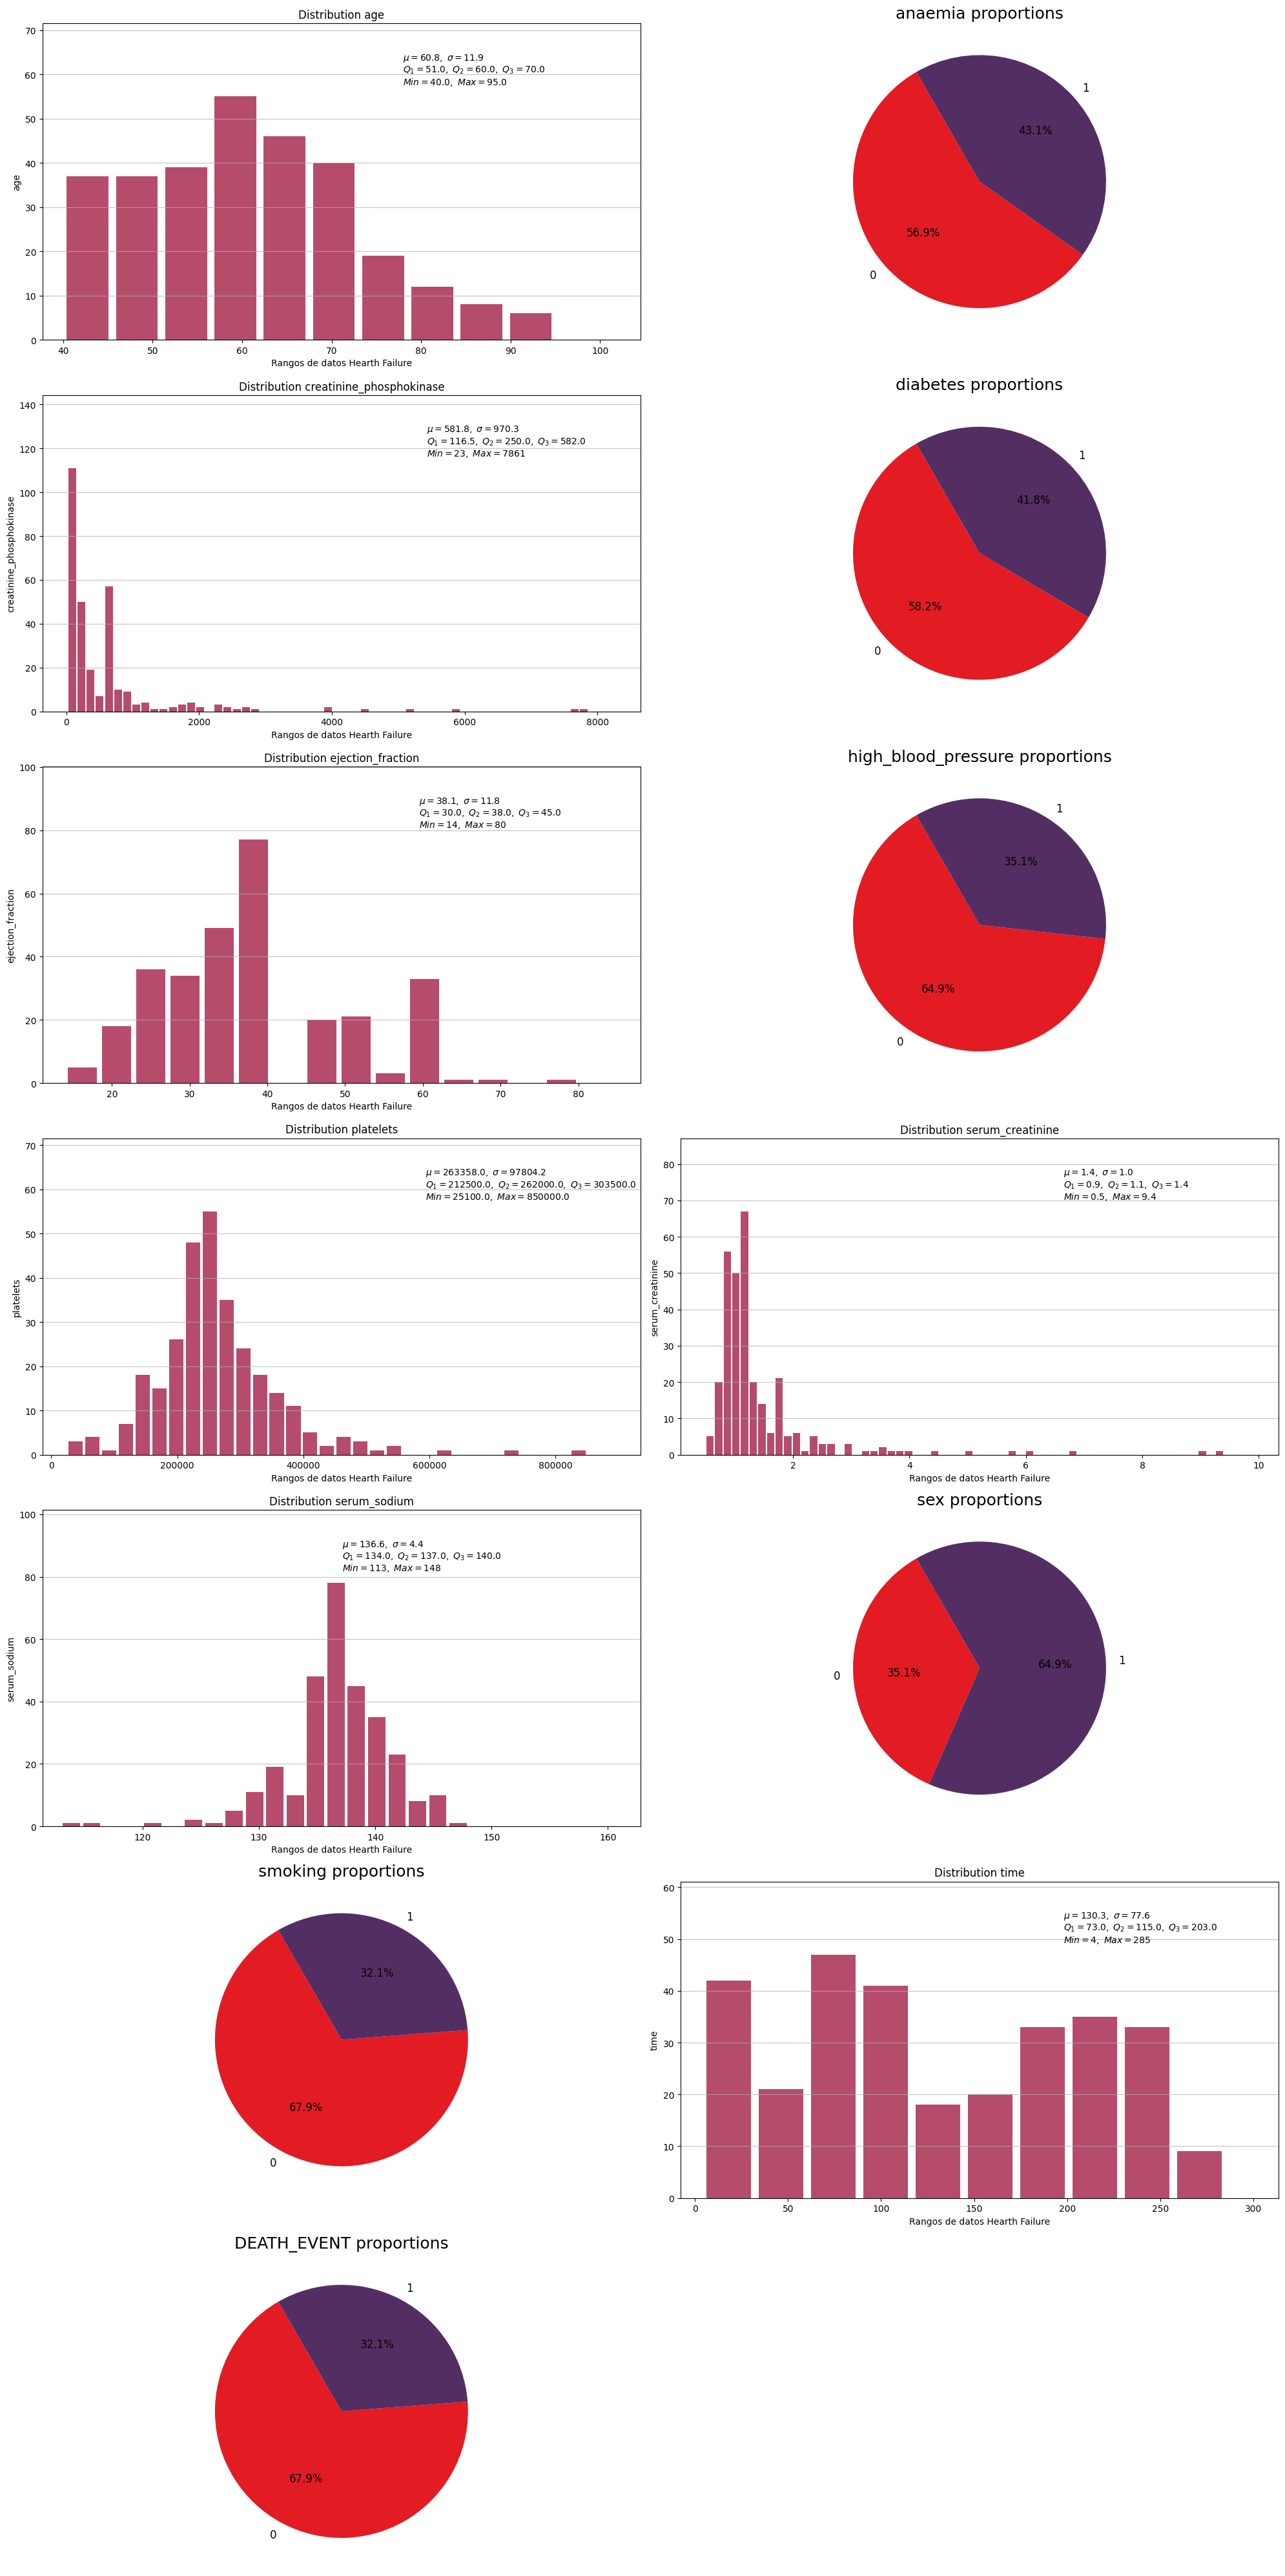

In [4]:
## Histogramas y analisis descriptivo

def descriptive():
    plt.figure(figsize=(20,40))
    for i, var in enumerate(datos.columns):
        plt.subplot(7,2,i+1)
        if len(datos[var].unique()) > 3:
            dataHist = datos[var]
            n, bins, patches = plt.hist(x=dataHist, bins='auto', color='#98002E',alpha=0.7, rwidth=0.85)
            maxfreq = n.max()
            maxval = dataHist.min() + (dataHist.max() - dataHist.min())*0.69
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('Rangos de datos Hearth Failure')
            plt.ylabel(f'{var}')
            plt.title(f'Distribution {var}')
            plt.text(maxval, maxfreq * 1.15, f'$\mu={round(dataHist.mean(),1)},$ $\sigma={round(dataHist.std(),1)}$')
            plt.text(maxval, maxfreq * 1.1, f'$Q_1={round(dataHist.quantile(q=0.25),1)},$ $Q_2={round(dataHist.quantile(q=0.5),1)},$ $Q_3={round(dataHist.quantile(q=0.75),1)}$')
            plt.text(maxval, maxfreq * 1.05, f'$Min={round(dataHist.min(),1)},$ $Max={round(dataHist.max(),1)}$')
            plt.ylim(ymax= maxfreq*1.3)
            plt.xlim(xmax= dataHist.max() * 1.1)
        else:
            data = datos.groupby(var).size()
            labels = data.keys()
            colors = ['#E31B23', '#532E63']
            plt.pie(x=data, autopct= "%.1f%%", labels=labels, pctdistance= 0.6, startangle=120, textprops={'fontsize':12}, colors = colors)
            plt.title((f"{var} proportions").format(var), fontsize = 18)
        plt.tight_layout()
    plt.show()
descriptive()

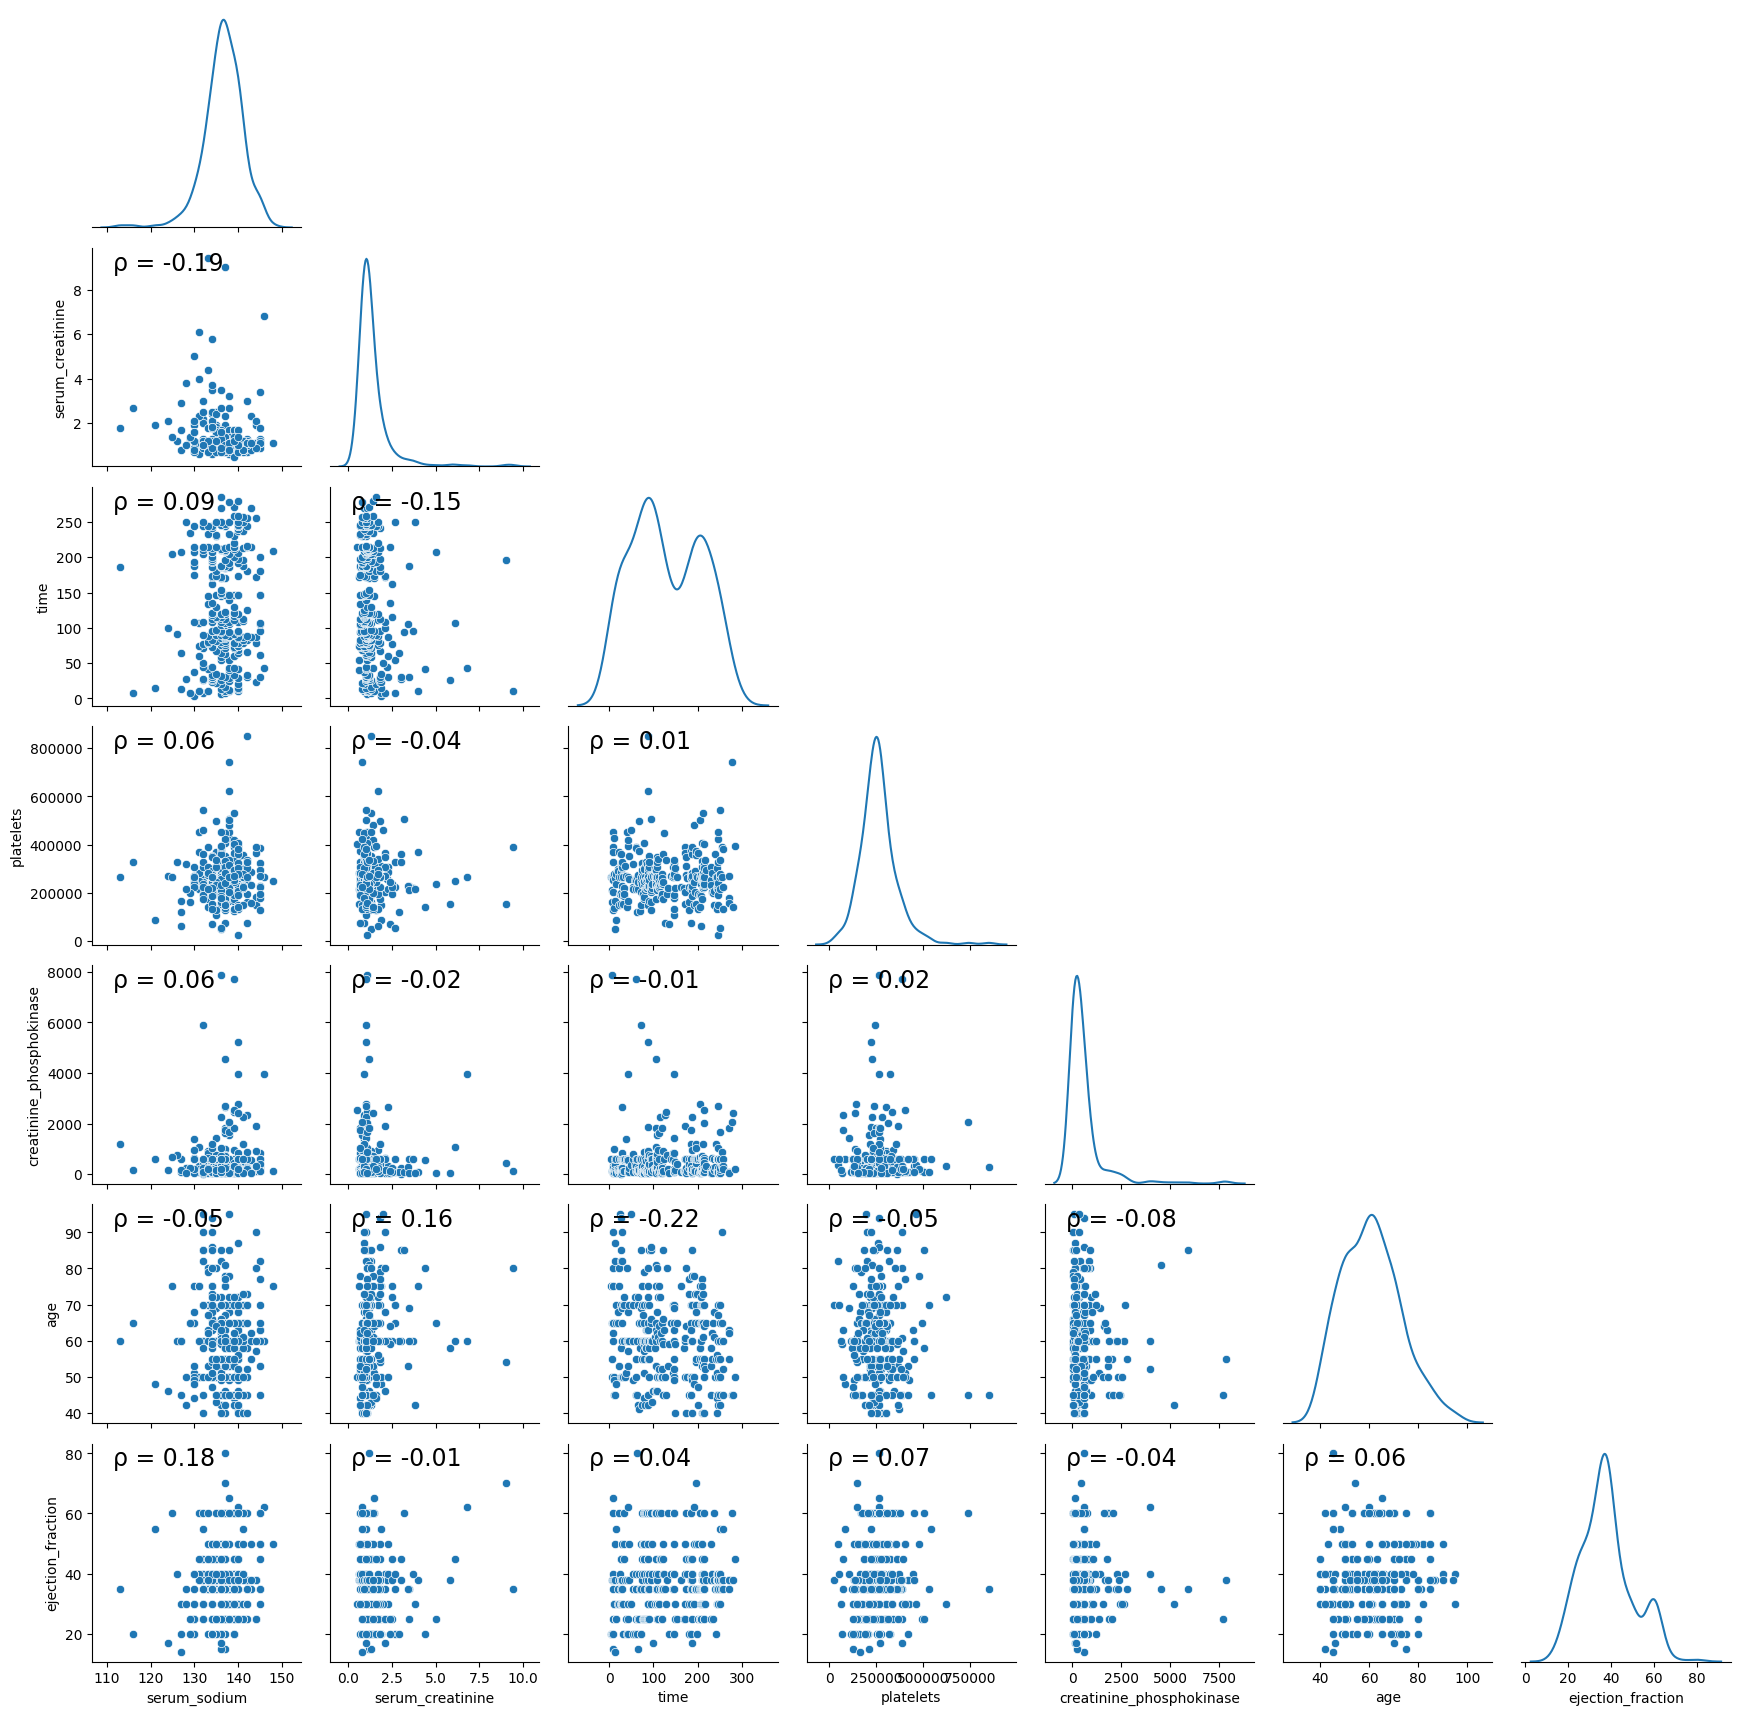

In [5]:
## Diagrama de correlación
from scipy.stats import pearsonr
import seaborn as sns

cats = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
cont = list(set(datos.columns) - set(cats))
## Correlogramas
def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes, fontsize= 17)
g = sns.PairGrid(datos[cont], diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(corrfunc)

In [6]:
c = datos.select_dtypes('int').corr().abs()
s = c.unstack()
so = s[s < 1].sort_values(kind="quicksort", ascending=False)
so[::2]

DEATH_EVENT               time                        0.526964
smoking                   sex                         0.445892
ejection_fraction         DEATH_EVENT                 0.268603
time                      high_blood_pressure         0.196439
DEATH_EVENT               serum_sodium                0.195204
anaemia                   creatinine_phosphokinase    0.190741
ejection_fraction         serum_sodium                0.175902
sex                       diabetes                    0.157730
                          ejection_fraction           0.148386
smoking                   diabetes                    0.147173
anaemia                   time                        0.141414
smoking                   anaemia                     0.107290
sex                       high_blood_pressure         0.104615
anaemia                   sex                         0.094769
diabetes                  serum_sodium                0.089551
serum_sodium              time                        0

Identificamos que el rango de edad de los paciente esta entre 40 a los 95 años, la media de edad de los pacientes es de 61 años. Se cuenta con un porcentaje total de hombres del 64.9% y de mujeres del 35.1%. Del total, el 32.1% de  pacientes son fumadores, el resto no lo son. Adicionalmente, el 43% de los pacientes presenta anemia y un 42 % presenta diabetes. Por otro lado, la proporción de personas hipertensas es del 35.1%.

La CPK presenta una distribución asimetrica con sesgo a la izquierda y cola a la derecha. La mayoria de datos de esta variable esta entre el Q1 y el Q3, que equivalen a 116 y 582 mcg/L respectivamente. El rango de los datos esta entre 23 y 7861 mcg/L, y presenta una media de 581 mcg/L. La creatina serica tiene tambien una distribución asimetrica con sesgo a la izquierda y outliers positivos.

La fracción de ejección presenta una distribución bimodal con un minimo de 14 % y un maximo de 80 % de sangre que sale del corazón en cada contracción.

El numero de plaquetas se aproxima a una distribución normal con una media 263358 kiloplatelets/mL  y una desviación de 97804 kiloplatelets/mL. El sodio tambien se aproxima a una distribución normal con media de 136 y una desviación de 4.4. Por otro lado, el tiempo de seguimiento sigue una distribución bimodal con una media de 130.3 dias y un rango entre los 4 y 285 dias.

Por último, del total de eventos de muerte el 32.1% de los pacientes murieron a causa de una insuficiencia cardiaca.

Teniendo en cuenta los correlogramos se identifica que no existe una correlación lineal entre las variables predictoras. Por lo que podemos decir que no hay información redundante dentro de las variables. Sin embargo, se encuentra que las variables tiempo y lso eventos de meurte tienen una leve relación, presentando una correlación de 0.52.

/var/folders/ty/0bh0gn7d63593pvgpfv35k0m0000gn/T/ipykernel_10367/2037148109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='DEATH_EVENT', y=num_var, saturation=0.5, width=0.4,
/var/folders/ty/0bh0gn7d63593pvgpfv35k0m0000gn/T/ipykernel_10367/2037148109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='DEATH_EVENT', y=num_var, saturation=0.5, width=0.4,
/var/folders/ty/0bh0gn7d63593pvgpfv35k0m0000gn/T/ipykernel_10367/2037148109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='DEATH_EVENT', 

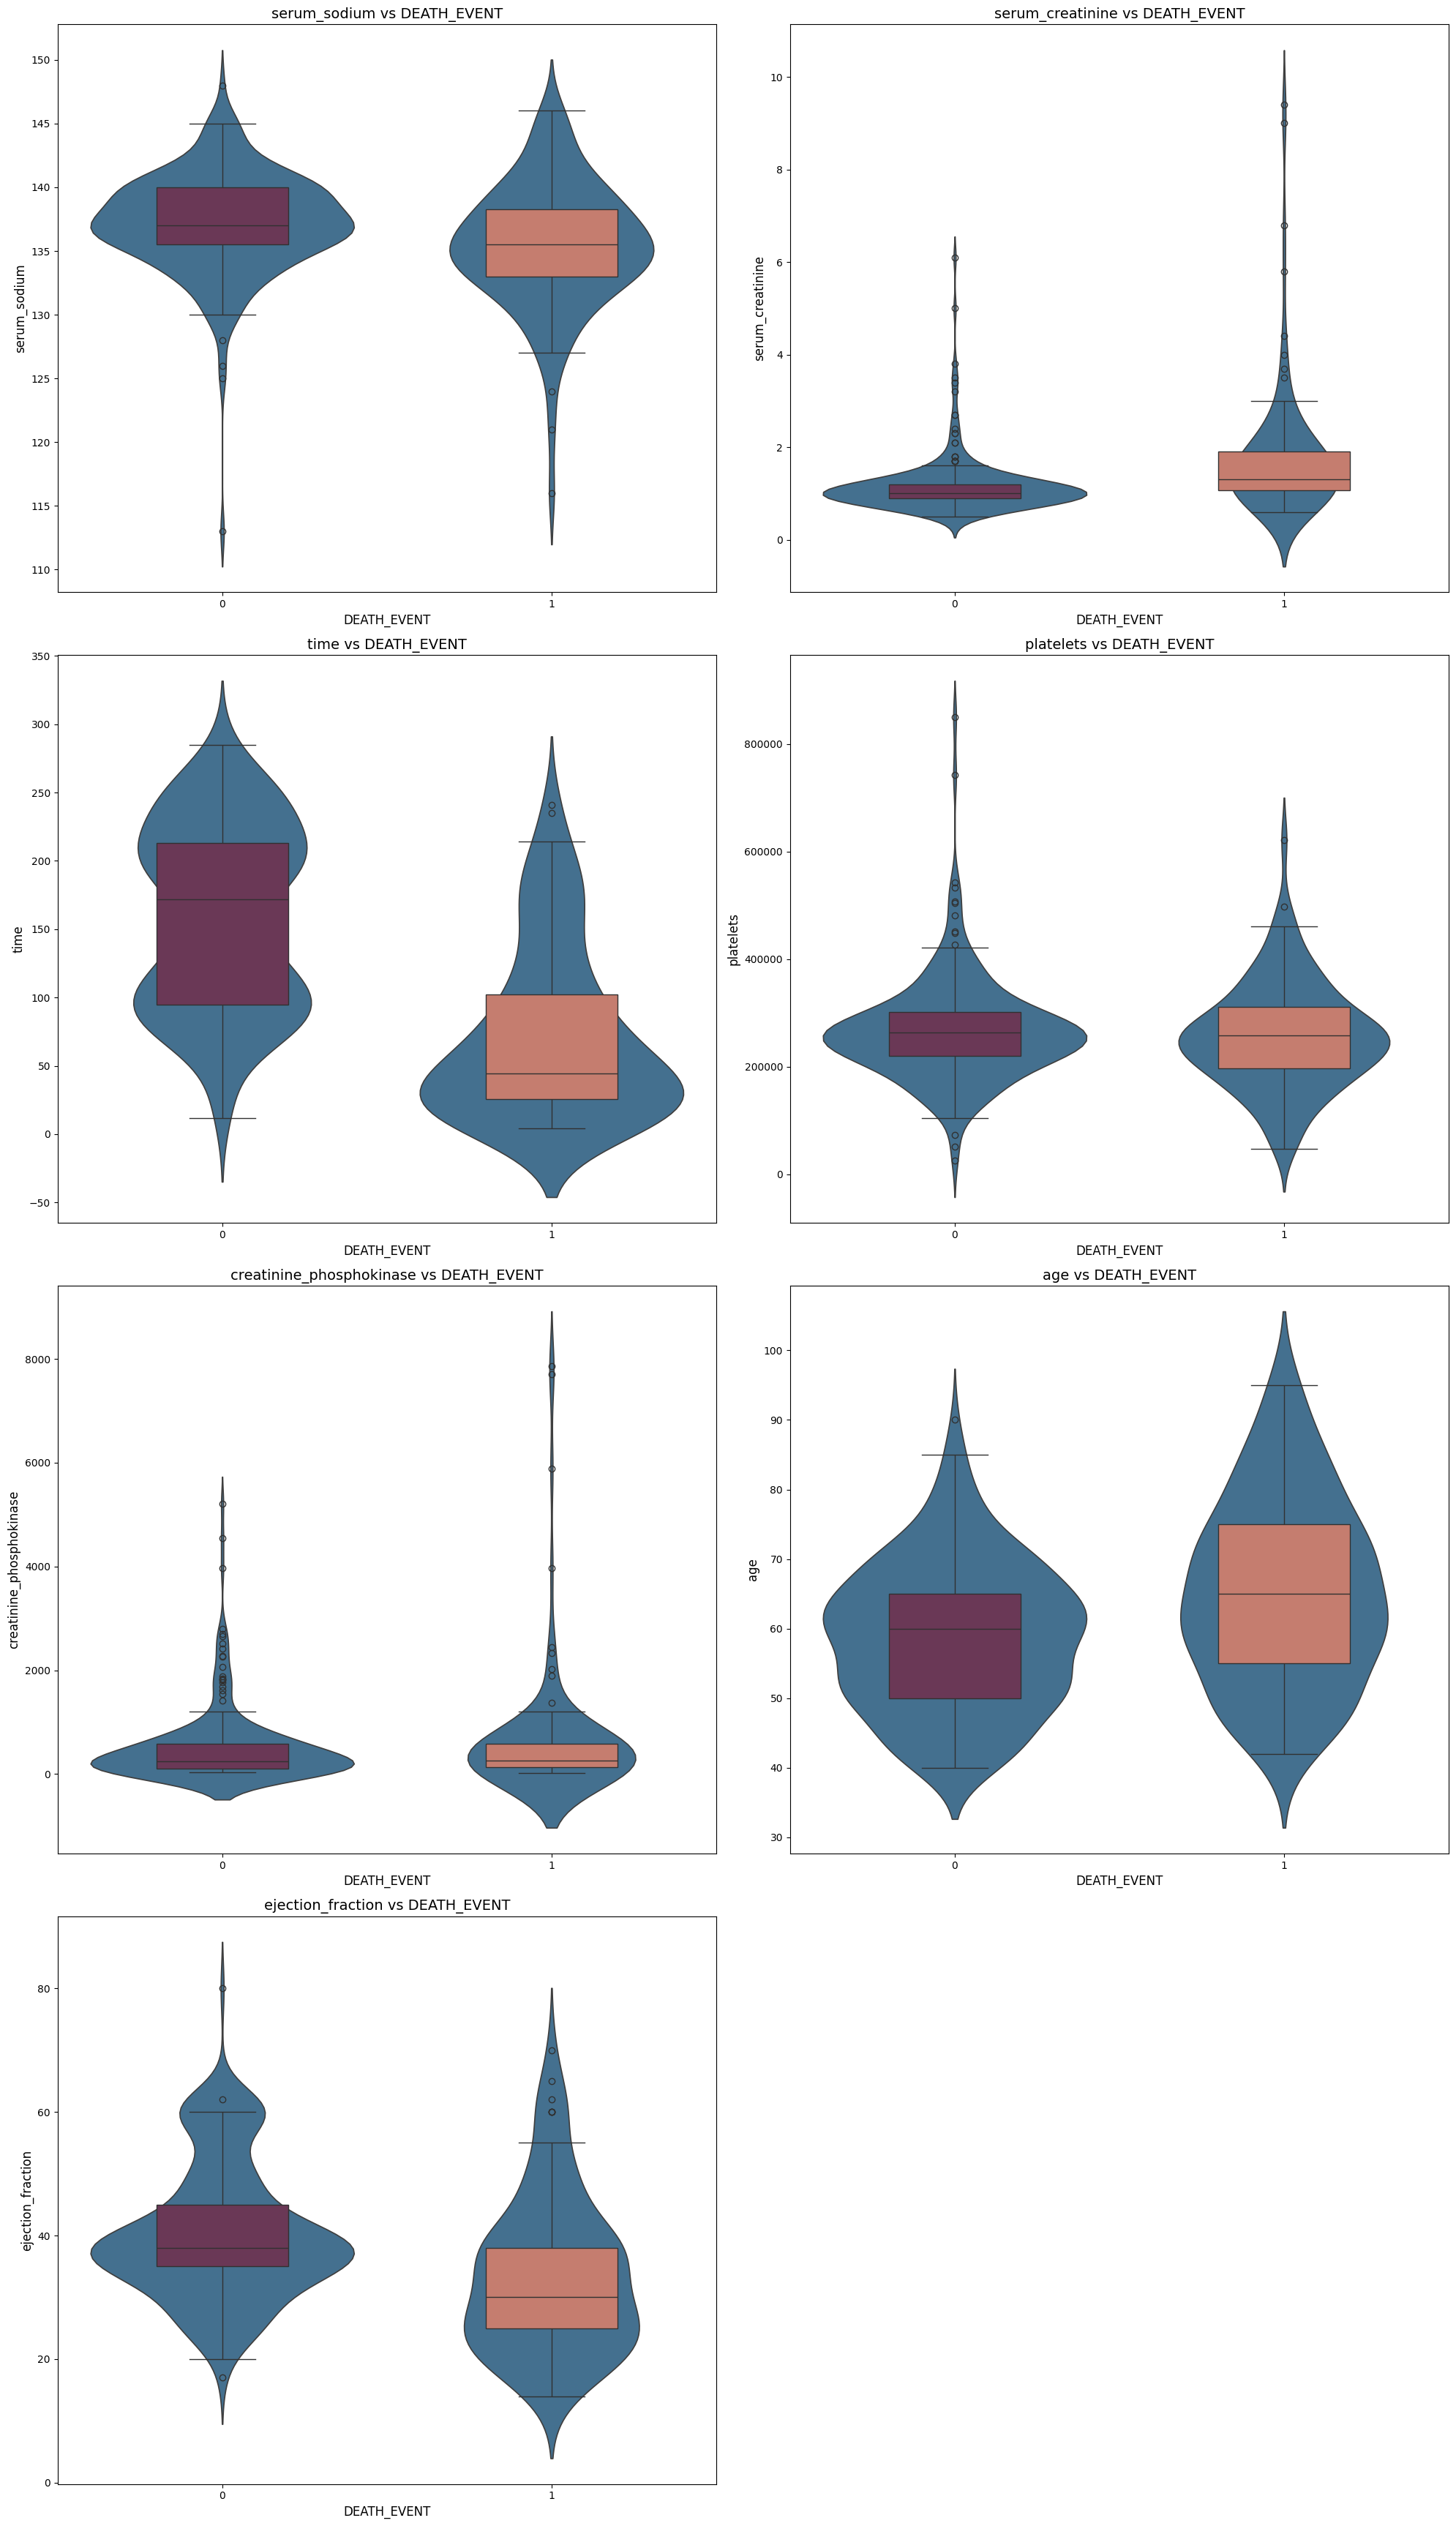

In [25]:
cats = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
cont = list(set(datos.columns) - set(cats))
def distribution_numeric_variables(datos):
    plt.figure(figsize=(20,60))
    for i, num_var in enumerate(cont):
        plt.subplot(7, 2, i + 1)
        ax = sns.violinplot(x= 'DEATH_EVENT', y = num_var, data = datos, inner = None, saturation = 0.5)
        sns.boxplot(data=datos, x='DEATH_EVENT', y=num_var, saturation=0.5, width=0.4,
                    palette='rocket', boxprops={'zorder': 2}, ax=ax)
        plt.title(f'{num_var} vs DEATH_EVENT', fontsize=14)
        plt.xlabel('DEATH_EVENT', fontsize=12)
        plt.ylabel(num_var, fontsize=12)
    plt.tight_layout()
    plt.show()
distribution_numeric_variables(datos)

Al analizar las variables se identifica que hay una diferencia significativa entre los pacientes que sobrevivieron y no a la insuficiencia cardiaca. Por ejemplo, los niveles de CPK en la sangre de un paciente que fallecio son mucho mas elevados y estos indican insuficiencia cardíaca, mientras que la cantidad de plaquetas en un paciente que no murío tienen un rango más amplío.

Por otro lado, el tiempo de seguimiento que estuvo un paciente que no fallecio es mayor al que si, para los pacientes que no sobrevivieron la cantidad de días que se encontraban en seguimiento se concentra entre los 0 y 100 días en cambio aquellos que sobrevivieron estuvieron entre 0 y 300 días con una mediana de 180 días aproximadamente.

Teniendo en cuenta que el sodio sirve para el correcto funcionamiento de músculos y nervios y un nivel bajo de este en la sangre podría deberse a una insuficiencia cardíaca, se puede identificar que los pacientes que murieron tienen una mediana ligeramente inferior a los que sobrevivieron, de igual manera los cuartiles son un poco más bajos. Con respecto al porcentaje de sangre que se bombea del corazón con cada latido, aquellos pacientes que no sobrevivieron presentan valores más bajos, en donde su concentración se encuentran entre el 20 y 40%, con una mediana del 30%. Es de mencionar que valores bajos en la fracción de ejección dan indicios de insuficiencia cardiaca.

Otra diferencia se encuentra en la creatinina sérica, en donde valores elevados de este indican insuficiencia cardiaca, al comparar los dos grupos de pacientes, aquellos que fallecieron tienen valores superiores y demasiados son atipicos de creatina sérica. Mientras que para los que sobrevivieron el rango de creatina esta entre 0 y 6 mg/dL, los que murieron se encuentran entre 0 y 11 mg/dL.

Finalmente, la edad para los pacientes que sobreviven se concentra mayormente entre los 40 y 70 años, con un Q1 de 50 y Q3 de 65 años, en cambio para los que fallecieron su edad se concentra entre los 40 y 90 años, con una mediana de 65 años. 

Al realizar la comparación entre los dos eventos de muerte, se logra identificar que aquellos que fallecieron presentan niveles más extremos en cada una de las variables, en donde por ejemplo CPK, fracción de ejección y sodio tienen valores inferiores que ya dan indicios de una insuficiencia cardiaca.

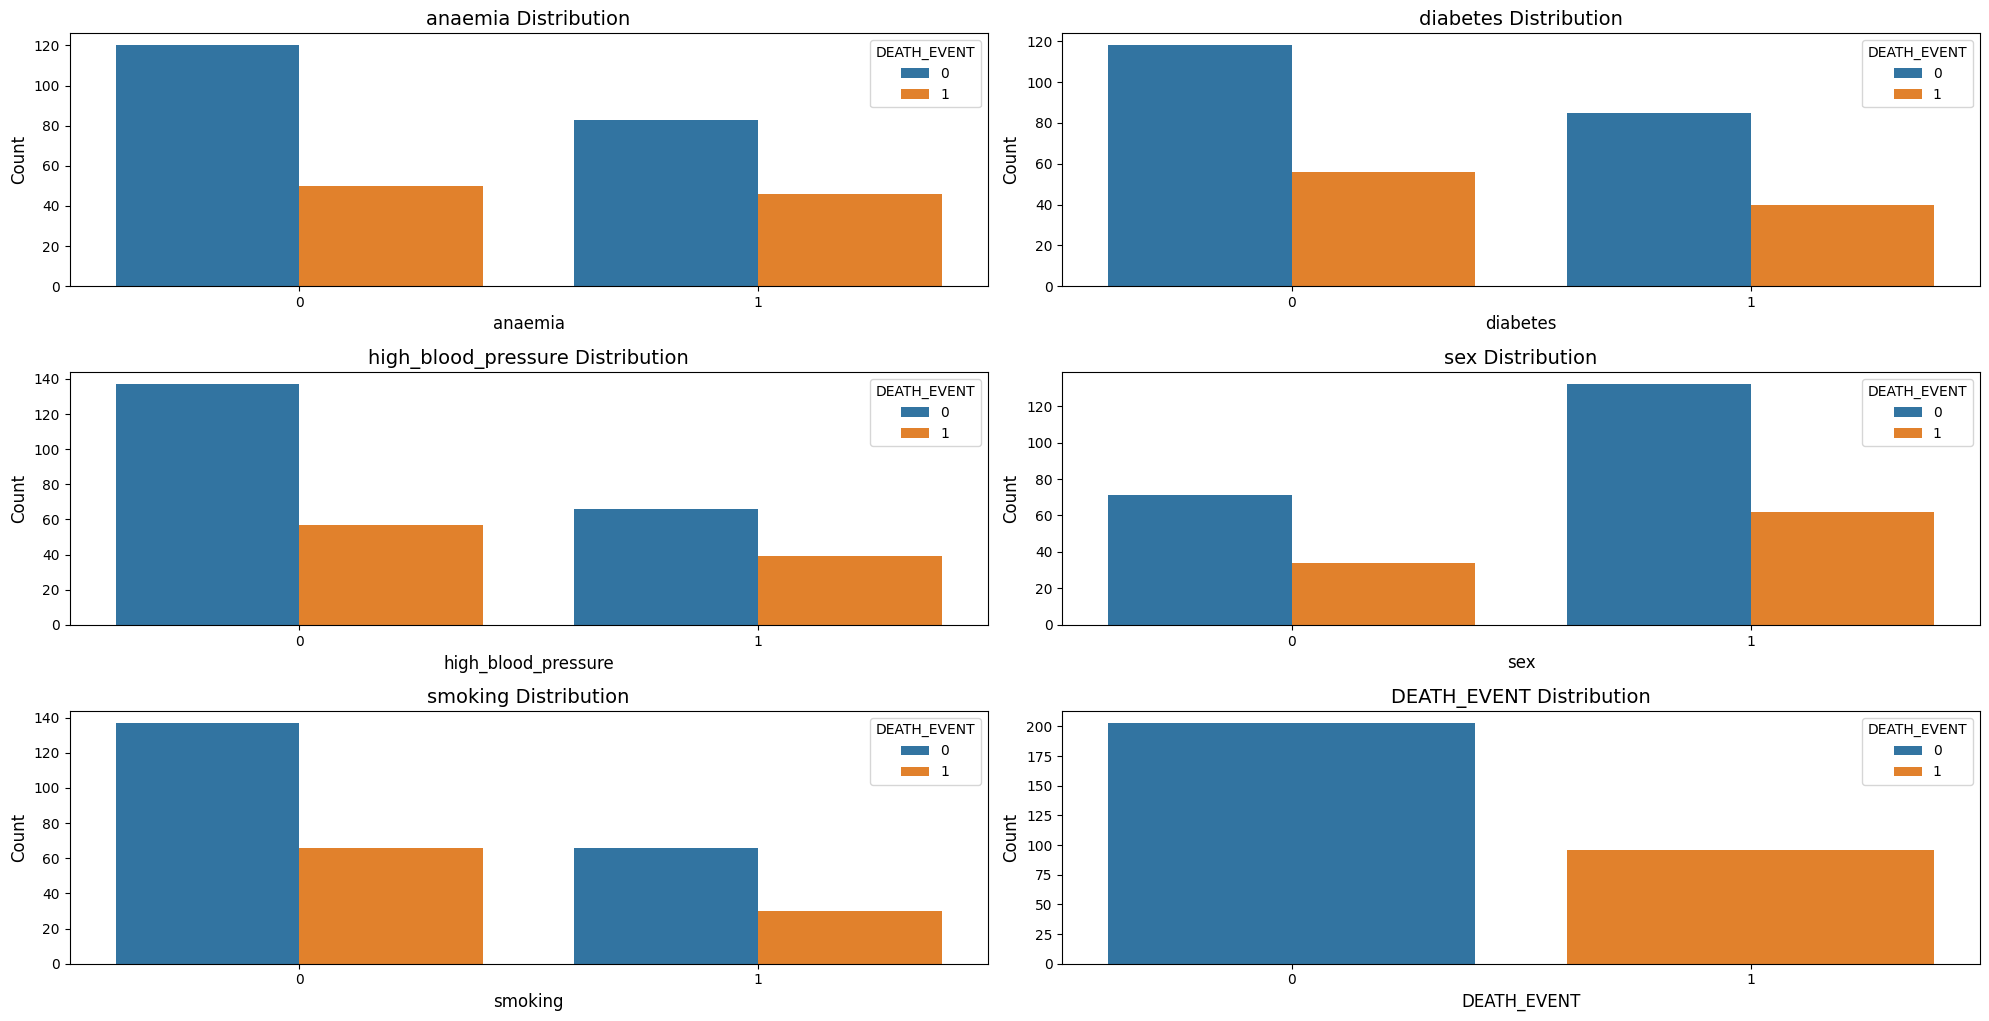

In [8]:
categorical_vars = datos.loc[:, cats]

def distribution_categorical_variables(datos):
    plt.figure(figsize=(20,20))
    for i, cat_var in enumerate(categorical_vars):
        plt.subplot(6, 2, i + 1)
        sns.barplot(x=cat_var, y='DEATH_EVENT', hue='DEATH_EVENT', data=categorical_vars, estimator=lambda x: len(x))
        plt.title(f'{cat_var} Distribution', fontsize=14)
        plt.xlabel(cat_var, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend(title='DEATH_EVENT', loc='upper right')
    plt.tight_layout()
    plt.show()

# Suponiendo que `datos` es tu conjunto de datos
distribution_categorical_variables(datos)

Al comparar la cantidad de pacientes que presentan anemia, para ambos grupos de eventos de muerte aproximadamente 50 pacientes la presentan, no obstante es superior la cantidad de pacientes que no la tienen y sobrevivieron (120). Por otro lado, para que los pacientes que fallecieron 40 tenian diabetes, mientras que para los que sobrevivieron 60 pacientes la tienen, de igual manera es mayor la cantidad de pacientes que sobrevivieron y no tienen diabetes.

La hipertensión la presentaron 40 pacientes que murieron, en cambio 60 no sufrian de hipertensión pero fallecieron. Por otra parte, de aquellos pacientes que fumaban 20 murieron y 60 sobrevivieron, mientras que de los que no fumaban 60 murieron y 130 no. Aproximadamente fallecieron 60 hombres y 30 mujeres.

## 2. Preparación de los datos

Luego del analisis descriptivo, identificamos que la base no presenta datos faltantes o nulos. Las variables categoricas ya se encuentran definidas como booleanos. Por otro lado, debido a la hetorogenidad de las medidas en las que se encuentran las variables, estas deben ser estandarizadas para su adecuado modelamiento. No identificados que se deban realizar tratamientos adicionales. Además, para utilizar los datos en los modelos predictivos que se vayan a utilizar necesitamos dividirlos en dos subconjuntos. El subconjunto de entrenamiento y el subconjunto de prueba.

In [9]:
YTotal = datos['DEATH_EVENT']
XTotal = datos.drop('DEATH_EVENT', axis=1)
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)

In [10]:
XTrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
18,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15
280,70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247
248,40.0,0,624,0,35,0,301000.0,1.0,142,1,1,214
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100
171,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146


In [11]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)
XEscaladoTest=scaler.transform(XTest)

## 3. Selección de modelos relevantes para responder a la pregunta


Dada la complejidad y la multitud de factores que contribuyen al desarrollo de enfermedades cardiovasculares —tales como hipertensión arterial, diabetes, colesterol alto, obesidad, falta de actividad física, y el consumo de tabaco y alcohol— se requiere de modelos predictivos capaces de manejar interacciones lineales y no lineales y la heterogeneidad en los datos de pacientes. Por lo tanto, se consideran varios candidatos para la modelización predictiva, cada uno con sus fortalezas en términos de precisión, capacidad de manejar grandes volúmenes de datos, habilidad para interpretar la importancia de las variables predictoras, asi como su capacidad para trabajar con datos desbalanceados y muestras pequeñas.

**Métodos de Ensamble (Bagging, Random Forest, Xtreme Gradient Boosting):** Estos modelos capturan no linealidades y relaciones complejas entre los factores de riesgo, ofreciendo al mismo tiempo una interpretación visual intuitiva de las decisiones de clasificación.

La selección del modelo más adecuado dependerá de un balance entre precisión predictiva y la capacidad de interpretar qué factores son más significativos para el riesgo de enfermedad cardiovascular, considerando la naturaleza y calidad de los datos disponibles del Instituto de Cardiología de Faisalabad y el Hospital Allied. Este enfoque no solo busca responder a la pregunta de investigación planteada, sino también contribuir a una estrategia de intervención más informada y efectiva, que pueda reducir la prevalencia de muertes por enfermedades cardiovasculares a nivel mundial.

## 4. Desarrollo y calibración de modelos.

Para la selección de variables en nuestro análisis, empleamos el método forward, una técnica progresiva cuyo criterio de elección se basó en identificar el modelo con el mejor coeficiente de determinación ajustado (R² ajustado). Este enfoque nos permitió evaluar y seleccionar, de manera incremental, las variables que contribuían significativamente al poder predictivo del modelo. 

### 4.1 Selección de Variables

In [12]:
p=len(XEscaladoTrain[1,])
datosTrain=len(yTrain)

In [13]:
r2adj = []
for a in range(1,p+1):
    if(a<(p)):
        sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=a,direction='forward')
        sfs.fit(XEscaladoTrain, yTrain)
        XTrainSeleccionado=sfs.fit_transform(XEscaladoTrain, yTrain)
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(XTrainSeleccionado, yTrain)
        r2Modelo=regAuxiliar.score(XTrainSeleccionado, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(datosTrain-1)/(datosTrain-a-1)
        r2adj.append(r2adjModelo)
    else:
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(XEscaladoTrain, yTrain)
        r2Modelo=regAuxiliar.score(XEscaladoTrain, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(datosTrain-1)/(datosTrain-a-1)
        r2adj.append(r2adjModelo)
    if(a>1):
        mensaje = ['Evaluación del modelo con', str(a),'variables']
    else:
        mensaje = ['Evaluación del modelo con', str(a),'variable']
    
    print(" ".join(mensaje))

Evaluación del modelo con 1 variable
Evaluación del modelo con 2 variables
Evaluación del modelo con 3 variables
Evaluación del modelo con 4 variables
Evaluación del modelo con 5 variables
Evaluación del modelo con 6 variables
Evaluación del modelo con 7 variables
Evaluación del modelo con 8 variables
Evaluación del modelo con 9 variables
Evaluación del modelo con 10 variables
Evaluación del modelo con 11 variables
Evaluación del modelo con 12 variables


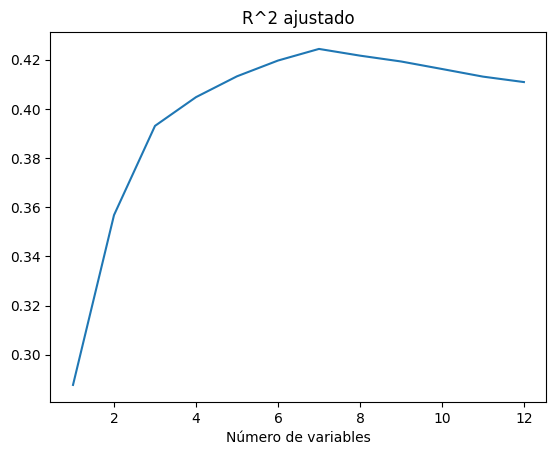

In [14]:
plt.plot(range(1,p+1),r2adj)
plt.xlabel('Número de variables')
plt.title('R^2 ajustado')
plt.show()

In [15]:
nVariablesSeleccionadas=np.argmax(r2adj)+1

if(nVariablesSeleccionadas<p):
    sfsElegido = SequentialFeatureSelector(LinearRegression(), n_features_to_select=nVariablesSeleccionadas)
    sfsElegido.fit(XEscaladoTrain, yTrain)
    XTrainSeleccionado=sfsElegido.fit_transform(XEscaladoTrain, yTrain)
    modeloFwd = LinearRegression()
    modeloFwd.fit(XTrainSeleccionado, yTrain)
    variablesSeleccionadas=np.array(range(1,p+1))[sfsElegido.get_support()]
else:
    modeloFwd = LinearRegression()
    modeloFwd.fit(XEscaladoTrain, yTrain)
    variablesSeleccionadas=np.array(range(1,p+1))
    
mensaje = ['El número de variables seleccionadas es', str(nVariablesSeleccionadas),'y corresponden a las columnas:',str(variablesSeleccionadas)]
print(" ".join(mensaje))

El número de variables seleccionadas es 7 y corresponden a las columnas: [ 1  3  5  8  9 10 12]


In [16]:
# variablesSeleccionadas = np.array([1,3,5,8,9,10,12])
XTrain_VS=XEscaladoTrain[:, variablesSeleccionadas-1]
XTest_VS= XEscaladoTest[:,variablesSeleccionadas-1]

In [17]:
yTrain = np.array(list(yTrain))
yTest = np.array(list(yTest))

A pesar de la rigurosidad en la selección, los modelos generados no alcanzaron valores de R² ajustado particularmente altos. De hecho, el modelo con el mejor desempeño exhibió un R² ajustado ligeramente superior a 0.42, lo cual, aunque no es excepcionalmente alto, sí representa el mejor balance encontrado entre complejidad y capacidad explicativa dentro del conjunto de datos analizado.

Dicho modelo óptimo incorporó 7 de las 12 variables iniciales, descartando específicamente las variables 2 (Anemia), 4 (Diabetes), 6 (hipertensión), 7(plaquetas) y 11 (Si es fumador). La exclusión de estas variables se justificó por su contribución marginal o nula al incremento del R² ajustado, lo que indica que su presencia no mejoraba, y en algunos casos podía incluso reducir, la eficacia predictiva del modelo. Este proceso selectivo subraya la importancia de una elección cuidadosa de variables, priorizando aquellas que realmente aportan al entendimiento y predicción del fenómeno estudiado, mientras se minimiza el riesgo de sobreajuste y se preserva la generalidad del modelo.

### 4.2 Selección de Modelo

In [19]:
# Aqui guardamos los resultados de los Modelos

errors = dict()
accs = dict()
precs = dict()

#### 4.2.1 Bagging

El error de clasificación para Bagging en la muestra de test es:
0.16161616161616163

La matriz de confusión para Bagging en la muestra de test es:
[[64  4]
 [12 19]]

El accuracy para Bagging en la muestra de test es:
0.8383838383838383

La precisión para Bagging en la muestra de test es:
0.8260869565217391


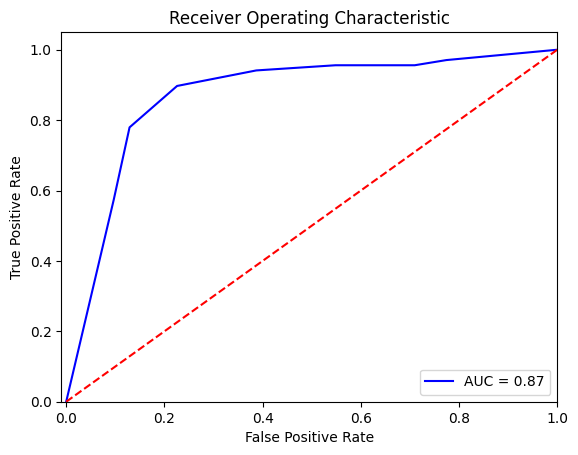

In [20]:
clfBag = BaggingClassifier(n_estimators=7, random_state=0)
clfBag.fit(XTrain_VS, yTrain)

prediccionBag=clfBag.predict(XTest_VS)


errorBG=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionBag[i]):
        errorBG+=1/len(yTest)
        
print('El error de clasificación para Bagging en la muestra de test es:')
print(errorBG)
print('')

print('La matriz de confusión para Bagging en la muestra de test es:')
print(confusion_matrix(y_true=yTest, y_pred=prediccionBag))

print('')
accuracyBG=accuracy_score(y_true=yTest, y_pred=prediccionBag)
print('El accuracy para Bagging en la muestra de test es:')
print(accuracyBG)

print('')
precisionBG=precision_score(y_true=yTest, y_pred=prediccionBag)
print('La precisión para Bagging en la muestra de test es:')
print(precisionBG)

errors['Bagging'] = errorBG
accs['Bagging'] = accuracyBG
precs['Bagging'] = precisionBG

prediccionBag=clfBag.predict_proba(XTest_VS)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionBag, pos_label=0)
AUCBag=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCBag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 4.2.2 Random Forest

El error de clasificación para Random Forest en la muestra de test es:
0.1313131313131313

La matriz de confusión para Random Forest en la muestra de test es:
[[64  4]
 [ 9 22]]

El accuracy para Random Forest en la muestra de test es:
0.8686868686868687

La precisión para Random Forest en la muestra de test es:
0.8461538461538461


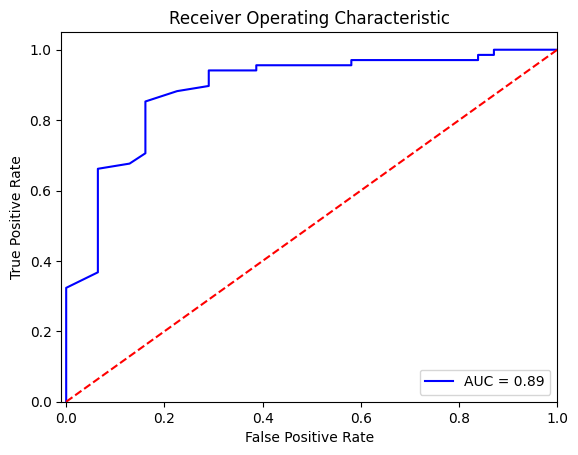

In [21]:
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain_VS, yTrain)

prediccionesRF = clfRF.predict(XTest_VS)

errorRF=0
for i in range(0,len(yTest)):
    if(yTest[i]!=prediccionesRF[i]):
        errorRF+=1/len(yTest)
        
print('El error de clasificación para Random Forest en la muestra de test es:')
print(errorRF)
print('')

print('La matriz de confusión para Random Forest en la muestra de test es:')
print(confusion_matrix(y_true=yTest, y_pred=prediccionesRF))

print('')
accuracyRF=accuracy_score(y_true=yTest, y_pred=prediccionesRF)
print('El accuracy para Random Forest en la muestra de test es:')
print(accuracyRF)

print('')
precisionRF=precision_score(y_true=yTest, y_pred=prediccionesRF)
print('La precisión para Random Forest en la muestra de test es:')
print(precisionRF)

errors['Random Forest'] = errorRF
accs['Random Forest'] = accuracyRF
precs['Random Forest'] = precisionRF


prediccionRF=clfRF.predict_proba(XTest_VS)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



#### 4.2.3 Xtreme Gradient Boosting

El error de clasificación para XGBoost en la muestra de test es:
0.1414141414141414

La matriz de confusión para XGBoost en la muestra de test es:
[[65  3]
 [11 20]]

El accuracy para XGBoost en la muestra de test es:
0.8585858585858586

La precisión para XGBoost en la muestra de test es:
0.8695652173913043


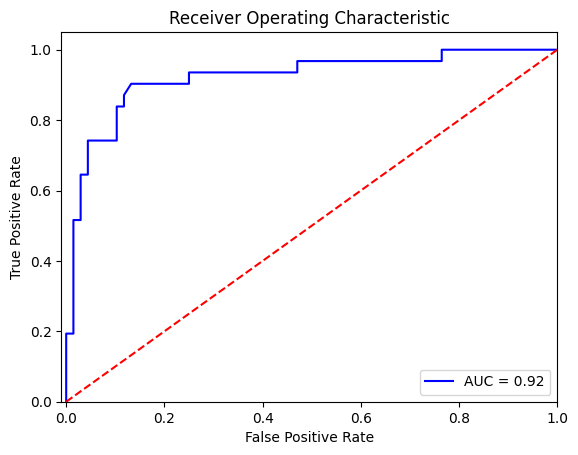

In [22]:
# Inicializar el clasificador XGBoost con parámetros similares
clfXGB = XGBClassifier(learning_rate=0.1, max_depth=1, random_state=0, use_label_encoder=False, eval_metric='logloss')
clfXGB.fit(XTrain_VS, yTrain)

# Predecir etiquetas en la muestra de test
prediccionXGB = clfXGB.predict(XTest_VS)

# Calcular el error de clasificación
errorXGB = 0
for i in range(len(yTest)):
    if yTest[i] != prediccionXGB[i]:
        errorXGB += 1 / len(yTest)

print('El error de clasificación para XGBoost en la muestra de test es:')
print(errorXGB)
print('')

# Calcular y mostrar la matriz de confusión
print('La matriz de confusión para XGBoost en la muestra de test es:')
print(confusion_matrix(y_true=yTest, y_pred=prediccionXGB))

# Calcular y mostrar accuracy
accuracyXGB = accuracy_score(y_true=yTest, y_pred=prediccionXGB)
print('\nEl accuracy para XGBoost en la muestra de test es:')
print(accuracyXGB)

# Calcular y mostrar precisión
precisionXGB = precision_score(y_true=yTest, y_pred=prediccionXGB)
print('\nLa precisión para XGBoost en la muestra de test es:')
print(precisionXGB)

# Guardar los resultados
errors['XGBoost'] = errorXGB
accs['XGBoost'] = accuracyXGB
precs['XGBoost'] = precisionXGB

# Calcular la curva ROC y AUC
prediccionXGB_proba = clfXGB.predict_proba(XTest_VS)[:, 1]
fpr, tpr, thresholds = roc_curve(yTest, prediccionXGB_proba, pos_label=1)
AUCXGB = auc(fpr, tpr)

# Graficar la curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % AUCXGB)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Los modelos de ensamble como Bagging, Random Forest y Gradient Boosting muestran un rendimiento superior, con el Random Forest alcanzando una precisión del 84.61% y un AUC de 0.89, y el Gradient Boosting destacando con una precisión del 86.9565% y el AUC más alto de todos los modelos evaluados, un impresionante 0.92. Estos resultados subrayan la eficacia de los métodos de ensamble en la mejora de la precisión y la capacidad predictiva a través de la combinación de múltiples modelos para reducir la varianza y el sesgo.

En conclusión, los modelos no lineales demuestran una capacidad robusta para abordar la predicción de eventos adversos relacionados con enfermedades cardiovasculares, con los métodos de Random Forest, Bagging y Gradient Boosting mostrando el mayor potencial.

#### 4.3 Resultado Final.

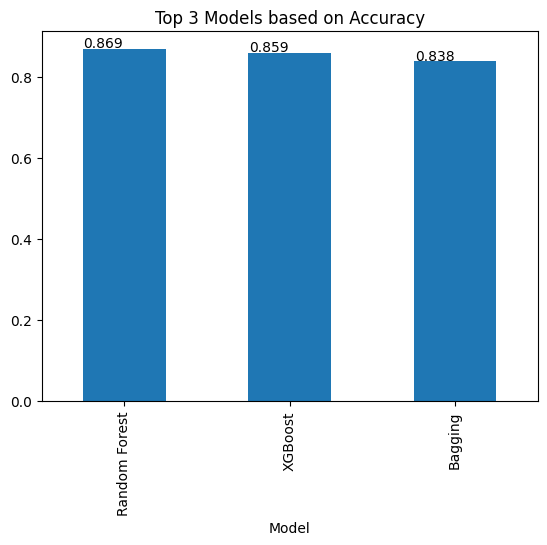

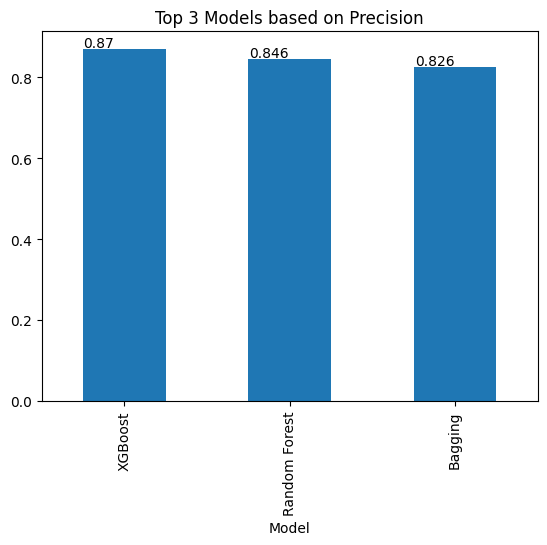

In [26]:
## Basandonos en el Error
nTopsModels = 3
    
## Basandonos en Accuracy
nTopsModels = 3
metric = 'Accuracy'

bestModelsAcc = sorted(accs.items(), key= lambda x:x[1], reverse = True)[0:nTopsModels]
df = pd.DataFrame(*zip(*bestModelsAcc)).reset_index().rename(columns={'index': metric, 0:'Model'})

ax = df.plot(x = 'Model', y = metric, kind='bar'
             , title = f'Top {nTopsModels} Models based on {metric}'
             , legend=False) 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))
    
## Basandonos en Precision
nTopsModels = 3
metric = 'Precision'

bestModelsPrecc = sorted(precs.items(), key= lambda x:x[1], reverse = True)[0:nTopsModels]
df = pd.DataFrame(*zip(*bestModelsPrecc)).reset_index().rename(columns={'index': metric, 0:'Model'})

ax = df.plot(x = 'Model', y = metric, kind='bar'
             , title = f'Top {nTopsModels} Models based on {metric}'
             , legend=False) 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

El modelo Random Forest mostró un error de 0.131, una exactitud del 86.86%, una precisión del 84.61% y un AUC de 0.89, evidenciando su habilidad para manejar con eficacia la complejidad de los datos médicos. El Gradient Boosting, por su parte, registró un error de 0.141, una exactitud del 85.85%, la mayor precisión entre los modelos evaluados con un 86.9565% y el AUC más alto de 0.92, resaltando su capacidad para mejorar iterativamente las predicciones. Finalmente, el Bagging presentó un error de 0.162, una exactitud del 83.83%, una precisión del 82.608% y un AUC de 0.87, demostrando su efectividad en la reducción de la varianza y el mejoramiento de la estabilidad de las predicciones mediante la agregación de múltiples modelos. 

Al considerar todas estas métricas de manera conjunta, se seleccionó el modelo que ofreció el mejor equilibrio entre minimizar el riesgo de clasificaciones incorrectas y maximizar la confiabilidad y precisión global de las predicciones. Aunque los tres modelos demostraron ser altamente competentes, el **Gradient Boosting** fue elegido como el modelo óptimo debido a su excepcional precisión y el AUC más alto, lo que indica su superioridad en la identificación precisa de pacientes con alto riesgo de ataques cardíacos. Esta elección se basó en un análisis comprensivo que ponderó todas las medidas de desempeño, destacando a Gradient Boosting como la herramienta más eficaz para la implementación en entornos clínicos, con el fin de optimizar la detección temprana y la prevención de enfermedades cardiovasculares.

### 5. Conclusión

La implementación y selección meticulosa del modelo Gradient Boosting, tras comparar diversas metodologías predictivas, resalta un avance significativo en la capacidad de anticipar eventos cardíacos adversos. Este modelo, distinguido por su alta precisión, exactitud, y un AUC sobresaliente, demuestra una notable eficacia en identificar pacientes en alto riesgo de sufrir ataques cardíacos. La relevancia de esta solución radica no solo en su potencial para salvar vidas mediante la detección temprana y la intervención preventiva, sino también en su capacidad para optimizar los recursos médicos al focalizar esfuerzos en individuos de mayor riesgo, lo cual es de inestimable valor en contextos organizacionales y de sistemas de salud donde los recursos son limitados.

Este enfoque predictivo abre puertas a estrategias de manejo personalizadas, permitiendo a las organizaciones de salud implementar medidas preventivas más efectivas y mejorar la calidad del cuidado ofrecido a los pacientes. Al mismo tiempo, la adopción de este modelo subraya la importancia de la analítica avanzada y la ciencia de datos en la toma de decisiones médicas, marcando un paso adelante hacia la medicina predictiva y la salud preventiva.

No obstante, es crucial reconocer las posibles limitaciones de esta implementación, incluyendo la dependencia de la calidad y la representatividad de los datos disponibles, así como la necesidad de interpretar cuidadosamente los resultados para evitar sesgos en la toma de decisiones clínicas. Además, el modelo, aunque robusto, puede requerir ajustes y validaciones continuas para adaptarse a nuevas poblaciones o cambios en los patrones de enfermedad.

A partir de los resultados de este proyecto, se plantea la oportunidad de realizar análisis más profundos y estudios posteriores que exploren la aplicabilidad del modelo en distintos contextos demográficos o geográficos, la integración de nuevas variables predictivas que puedan enriquecer el modelo, y el desarrollo de sistemas de alerta temprana que faciliten intervenciones aún más proactivas. Asimismo, sería beneficioso investigar la interacción entre los factores de riesgo identificados y otros determinantes sociales de la salud, para comprender más ampliamente cómo abordar de manera integral la prevención de enfermedades cardiovasculares. La solución desarrollada, por lo tanto, no solo representa un avance en la lucha contra las enfermedades cardiovasculares, sino que también establece un fundamento sólido para futuras investigaciones y mejoras en el campo de la salud predictiva y preventiva.

### Bibliografía
* Ahmad T, Munir A, Bhatti SH, Aftab M, Raza MA. Survival analysis of heart failure patients: a case study. PLoS ONE. 2017; 12(7):0181001
* Bredy C, Ministeri M, Kempny A, Alonso-Gonzalez R, Swan L, Uebing A, Diller G-P, Gatzoulis MA, Dimopoulos K. New York Heart Association (NYHA) classification in adults with congenital heart disease: relation to objective measures of exercise and outcome. Eur Heart J – Qual Care Clin Outcomes. 2017; 4(1):51–8.